In [1]:
#Régression linéaire multiple, two features , modèle polynomiâle
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [9]:
x , y = make_regression(n_samples=100, n_features=2, noise = 10)

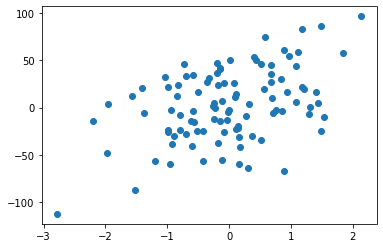

In [12]:
plt.scatter(x[:,1],y)

In [13]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [17]:
y = y.reshape((y.shape[0],1))
y.shape

(100, 1)

In [23]:
X = np.hstack((x, np.ones((x.shape[0],1))))
X.shape

(100, 3)

In [24]:
print(X[:10])

[[-0.55822754 -0.18692767  1.        ]
 [ 1.47419532 -0.73505636  1.        ]
 [-1.07072737  0.15107971  1.        ]
 [-0.34334803 -0.99613729  1.        ]
 [-0.45974038 -0.70410493  1.        ]
 [ 2.20251602  1.18608572  1.        ]
 [ 0.02641139  0.84438887  1.        ]
 [-0.46391391 -0.24803565  1.        ]
 [ 1.18186337 -1.40499397  1.        ]
 [ 0.2689326  -1.37478882  1.        ]]


In [26]:
theta = np.random.randn(3,1)
theta.shape

(3, 1)

In [27]:
#Etape 2: modèle
#créer fonction X produit theta
def model(X, theta):
    return X.dot(theta)

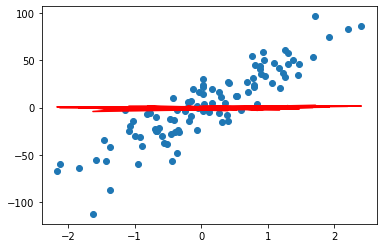

In [28]:
plt.plot(x[:,0],model(X, theta), c='r')
plt.scatter(x[:,0], y)

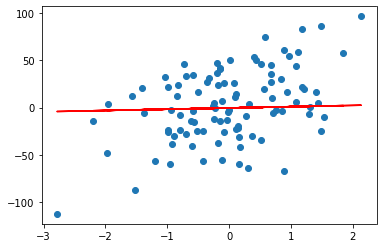

In [29]:
plt.plot(x[:,1],model(X, theta), c='r')
plt.scatter(x[:,1], y)

In [30]:
#Fonction cout (erreur quadratique moyenne) >> on veut que ça tende vers 0
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [31]:
#Gradient et Descente de gradient
#Gradient
def grad(X,y,theta):
    m=len(y)
    return (1/m)*X.T.dot( model(X,theta) - y)

In [32]:
#Algo de descente de gradient
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    
    #---------------on a rajouté ces 2 lignes pour savoir si la machine a réussi à bien apprendre----------
    cost_history = np.zeros(n_iterations)
    for i in range (0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        #------------ on va insérer dans ce vecteur (après chaque itération) -----------
        cost_history[i]= cost_function(X,y,theta)
        
    return theta , cost_history

In [71]:
theta_final ,cost_history = gradient_descent(X,y,theta, learning_rate=0.05, n_iterations=1000)
theta_final

array([[34.11637718],
       [14.55954316],
       [ 0.83386714]])

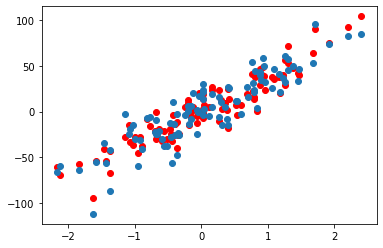

In [72]:
#vérification de l'apprentissage du madèle (Var x1)
predictions = model(X,theta_final)
plt.scatter(x[:,0],predictions,c='r')
plt.scatter(x[:,0],y)

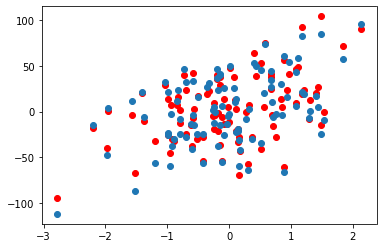

In [73]:
#vérification de l'apprentissage du madèle (Var x2)
predictions = model(X,theta_final)
plt.scatter(x[:,1],predictions,c='r')
plt.scatter(x[:,1],y)

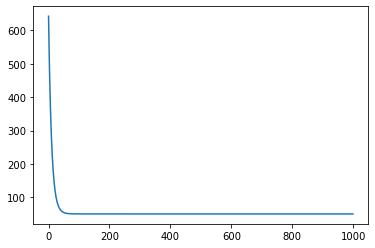

In [74]:
#cost_history ou visualiser la courbe d'apprentissage de notre algo
plt.plot(range(1000), cost_history)

In [75]:
#Coefficient de détermination (permet de montrer la performance de notre modèle- plus proche de 1 plus le modèle performant)
def coef_determination(y , pred):
    u = ((y-pred)**2).sum()
    v = ((y- y.mean())**2).sum()
    return 1- u/v

In [76]:
coef_determination(y, predictions)

0.9298170007847301

In [79]:
#Tracer le diagramme 3D de comparaison de valeurs reélles
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

<IPython.core.display.Javascript object>